In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv("cleaned_US_Accidents.csv", index_col=0)

In [19]:
infrastructure = df.columns.tolist()[11:]
X = df[infrastructure]
y = df['Severity']

In [20]:
#one hot encoding
X = X.astype(int)

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#train the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rfc.fit(X_train, y_train)

print("OOB score:", rfc.oob_score_)

OOB score: 0.7624543342202396


In [21]:
#get the feature importances
importance = rfc.feature_importances_
feat_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

print("Feature Importance:")
print(feat_importance)

Feature Importance:
Traffic_Signal     0.352799
Crossing           0.326709
Stop               0.121432
Station            0.073261
Junction           0.042009
Amenity            0.036849
Railway            0.025857
Give_Way           0.007354
Traffic_Calming    0.005994
No_Exit            0.005183
Bump               0.002260
Roundabout         0.000293
Turning_Loop       0.000000
dtype: float64


In [22]:
print("Train accuracy:", rfc.score(X_train, y_train))
print("Test accuracy:", rfc.score(X_test, y_test))

Train accuracy: 0.7625204139015467
Test accuracy: 0.7625588141291463


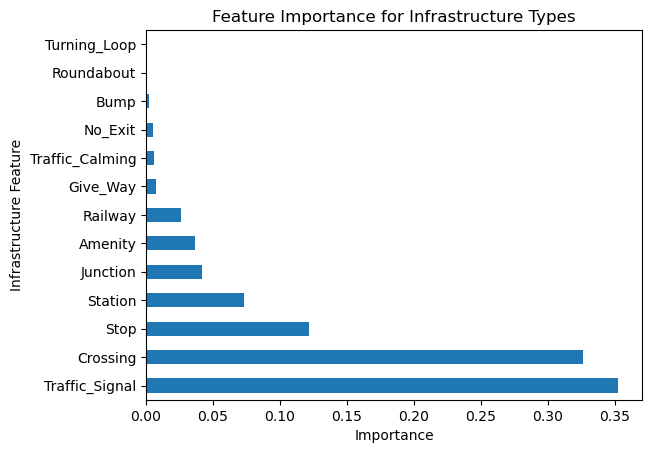

In [24]:
feat_importance.plot(kind='barh')
plt.title("Feature Importance for Infrastructure Types")
plt.xlabel("Importance")
plt.ylabel("Infrastructure Feature")
plt.show()